In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
jakpus_analisis=pd.read_excel('Jakpus_Analisis.xlsx')
jakpus_analisis.head()

,Unnamed: 0,Tanggal,Jumlah.Kasus.DBD (y),Average.of.Tavg,Average.of.Rhavg,Sum.of.RR,Average.of.ss,Sum.of.pengguna.krl,Jumlah.Kasus.DBD lag 4
0,11,09/03/2008 - 15/03/2008,56,28.571429,74.857143,4.8,2.210714,4.266629,49
1,12,16/03/2008 - 22/03/2008,50,28.742857,81.428571,2.8,6.085714,4.089555,50
2,13,23/03/2008 - 29/03/2008,61,27.600000,83.285714,0.6,5.085714,3.711553,48
3,14,30/03/2008 - 05/04/2008,99,26.771429,85.000000,387.7,6.328571,4.581505,47
4,15,06/04/2008 - 12/04/2008,84,25.900000,83.428571,116.1,2.930952,4.447622,56


In [3]:
jakpus_analisis_lag_4=jakpus_analisis.iloc[0:825:,2:9]
jakpus_analisis_lag_4.tail()

,Jumlah.Kasus.DBD (y),Average.of.Tavg,Average.of.Rhavg,Sum.of.RR,Average.of.ss,Sum.of.pengguna.krl,Jumlah.Kasus.DBD lag 4
820,13,29.285714,70.714286,0.0,7.085714,3.289730,11
821,17,30.171429,66.000000,0.0,8.014286,3.305846,15
822,9,30.542857,70.261905,0.0,6.571429,3.237417,12
823,6,29.959524,71.857143,0.0,6.885714,3.618197,14
824,6,29.828571,75.000000,0.0,6.914286,3.785022,13


In [25]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jakpus_analisis_lag_4))
train = jakpus_analisis_lag_4[:split_point]
test = jakpus_analisis_lag_4[split_point:]
X_train = train.drop('Jumlah.Kasus.DBD', axis=1)
y_train = train['Jumlah.Kasus.DBD']
X_test = test.drop('Jumlah.Kasus.DBD', axis=1)
y_test = test['Jumlah.Kasus.DBD']

n_estimators = range(1, 823, 10)
max_depth = range(1, 101)
min_samples_split = range(2, 14)
min_samples_leaf = range(1, 7)
max_features = [None, 'sqrt']
bootstrap = [True]

total_iterations = (len(n_estimators) * len(max_depth) * 
                    len(min_samples_split) * len(min_samples_leaf) * 
                    len(max_features) * len(bootstrap))

best_params = {}
best_r2_train = float("-inf")
best_r2_test = float("-inf")
best_s = float("-inf")
k = 0

# DataFrame untuk menyimpan hasil tuning
results = pd.DataFrame(columns=[
    'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf',
    'max_features', 'bootstrap', 'R2_train', 'R2_test', 'R2_total'
])

# Modifikasi loop tuning
for n in n_estimators:
    for depth in max_depth:
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                for feature in max_features:
                    for boot in bootstrap:
                        
                        # Clear output and print progress
                        k += 1
                        clear_output(wait=True)
                        
                        percent_complete = (k / total_iterations) * 100
                        print(f"Progress: {k}/{total_iterations} iterations completed ({percent_complete:.2f}%)")
                        
                        # Buat model dan fit ke data
                        model = RandomForestRegressor(
                            n_estimators=n,
                            max_depth=depth,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            max_features=feature,
                            bootstrap=boot,
                            n_jobs=-1,
                            random_state=42
                        )
                        model.fit(X_train, y_train)

                        # Prediksi dan hitung R^2
                        y_train_pred = model.predict(X_train)
                        y_test_pred = model.predict(X_test)
                        r2_train = r2_score(y_train, y_train_pred)
                        r2_test = r2_score(y_test, y_test_pred)
                        total_r2 = r2_test + r2_train

                        # Simpan hasil ke DataFrame
                        results = pd.concat([results, pd.DataFrame([{
                            'n_estimators': n,
                            'max_depth': depth,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf,
                            'max_features': feature,
                            'bootstrap': boot,
                            'R2_train': r2_train,
                            'R2_test': r2_test,
                            'R2_total': total_r2
                        }])], ignore_index=True)

                        # Perbarui parameter terbaik jika R^2 total lebih tinggi
                        if total_r2 > best_s:
                            best_s = total_r2
                            best_r2_train = r2_train
                            best_r2_test = r2_test
                            best_params = {
                                'n_estimators': n,
                                'max_depth': depth,
                                'min_samples_split': split,
                                'min_samples_leaf': leaf,
                                'max_features': feature,
                                'bootstrap': boot
                            }
                        del model

# Setelah selesai, simpan DataFrame ke file CSV atau langsung gunakan untuk grafik
results.to_csv("tuning_results3.csv", index=False)  # Menyimpan hasil ke file CSV

print("Best Parameters for R² Total:", best_params)
print("Best R² Total:", best_s)
print("Best R² Train:", best_r2_train)
print("Best R² Test:", best_r2_test)

Progress: 1195200/1195200 iterations completed (100.00%)
Best Parameters for R² Total: {'n_estimators': 41, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}
Best R² Total: 1.6959115689470543
Best R² Train: 0.9545591688815382
Best R² Test: 0.7413524000655161


In [4]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jakpus_analisis_lag_4))
train = jakpus_analisis_lag_4[:split_point]
test = jakpus_analisis_lag_4[split_point:]
X_train = train.drop('Jumlah.Kasus.DBD (y)', axis=1)
y_train = train['Jumlah.Kasus.DBD (y)']
X_test = test.drop('Jumlah.Kasus.DBD (y)', axis=1)
y_test = test['Jumlah.Kasus.DBD (y)']

model=RandomForestRegressor(n_estimators=41,max_depth=20,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',bootstrap=True,random_state=42)
model.fit(X_train, y_train)
# Prediksi dan hitung R^2
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
total_r2 = r2_test + r2_train

print(r2_train)
print(r2_test)
print(total_r2)

0.9545591688815382
0.7413524000655161
1.6959115689470543


In [5]:
jakpus_copula=pd.read_excel("Jakpus_Copula.xlsx")
jakpus_copula_2=jakpus_copula.iloc[0:825:,2:10]
jakpus_copula_2.head()

,Jumlah.Kasus.DBD (y),Average.of.Tavg,Average.of.Rhavg,Sum.of.RR,Average.of.ss,Sum.of.pengguna.krl,Jumlah.Kasus.DBD lag 4,Jumlah_Kasus_Jakut
0,56,28.571429,74.857143,4.8,2.210714,4.266629,49,53
1,50,28.742857,81.428571,2.8,6.085714,4.089555,50,76
2,61,27.600000,83.285714,0.6,5.085714,3.711553,48,66
3,99,26.771429,85.000000,387.7,6.328571,4.581505,47,74
4,84,25.900000,83.428571,116.1,2.930952,4.447622,56,86


In [18]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jakpus_copula_2))
train = jakpus_copula_2[:split_point]
test = jakpus_copula_2[split_point:]
X_train = train.drop('Jumlah.Kasus.DBD (y)', axis=1)
y_train = train['Jumlah.Kasus.DBD (y)']
X_test = test.drop('Jumlah.Kasus.DBD (y)', axis=1)
y_test = test['Jumlah.Kasus.DBD (y)']

model=RandomForestRegressor(n_estimators=41,max_depth=20,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',bootstrap=True,random_state=42)
model.fit(X_train, y_train)
# Prediksi dan hitung R^2
y_train_pred_2 = model.predict(X_train)
y_test_pred_2 = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred_2)
r2_test = r2_score(y_test, y_test_pred_2)
total_r2 = r2_test + r2_train

print(r2_train)
print(r2_test)
print(total_r2)

0.9707936254414172
0.8331539402268408
1.803947565668258


In [6]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jakpus_copula_2))
train = jakpus_copula_2[:split_point]
test = jakpus_copula_2[split_point:]
X_train = train.drop('Jumlah.Kasus.DBD (y)', axis=1)
y_train = train['Jumlah.Kasus.DBD (y)']
X_test = test.drop('Jumlah.Kasus.DBD (y)', axis=1)
y_test = test['Jumlah.Kasus.DBD (y)']

model=RandomForestRegressor(n_estimators=31,max_depth=17,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',bootstrap=True,random_state=42)
model.fit(X_train, y_train)
# Prediksi dan hitung R^2
y_train_pred_2 = model.predict(X_train)
y_test_pred_2 = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred_2)
r2_test = r2_score(y_test, y_test_pred_2)
total_r2 = r2_test + r2_train

print(r2_train)
print(r2_test)
print(total_r2)

0.9690687468147144
0.8560029917670173
1.8250717385817317


In [10]:
tanggal=jakpus_analisis.iloc[0:825:,1]
tanggal.tail()

# Total panjang yang diinginkan
train_length = 577
test_length = 248

# Membagi menjadi train dan test
time_train = tanggal[:train_length]
time_test = tanggal[train_length:train_length + test_length]

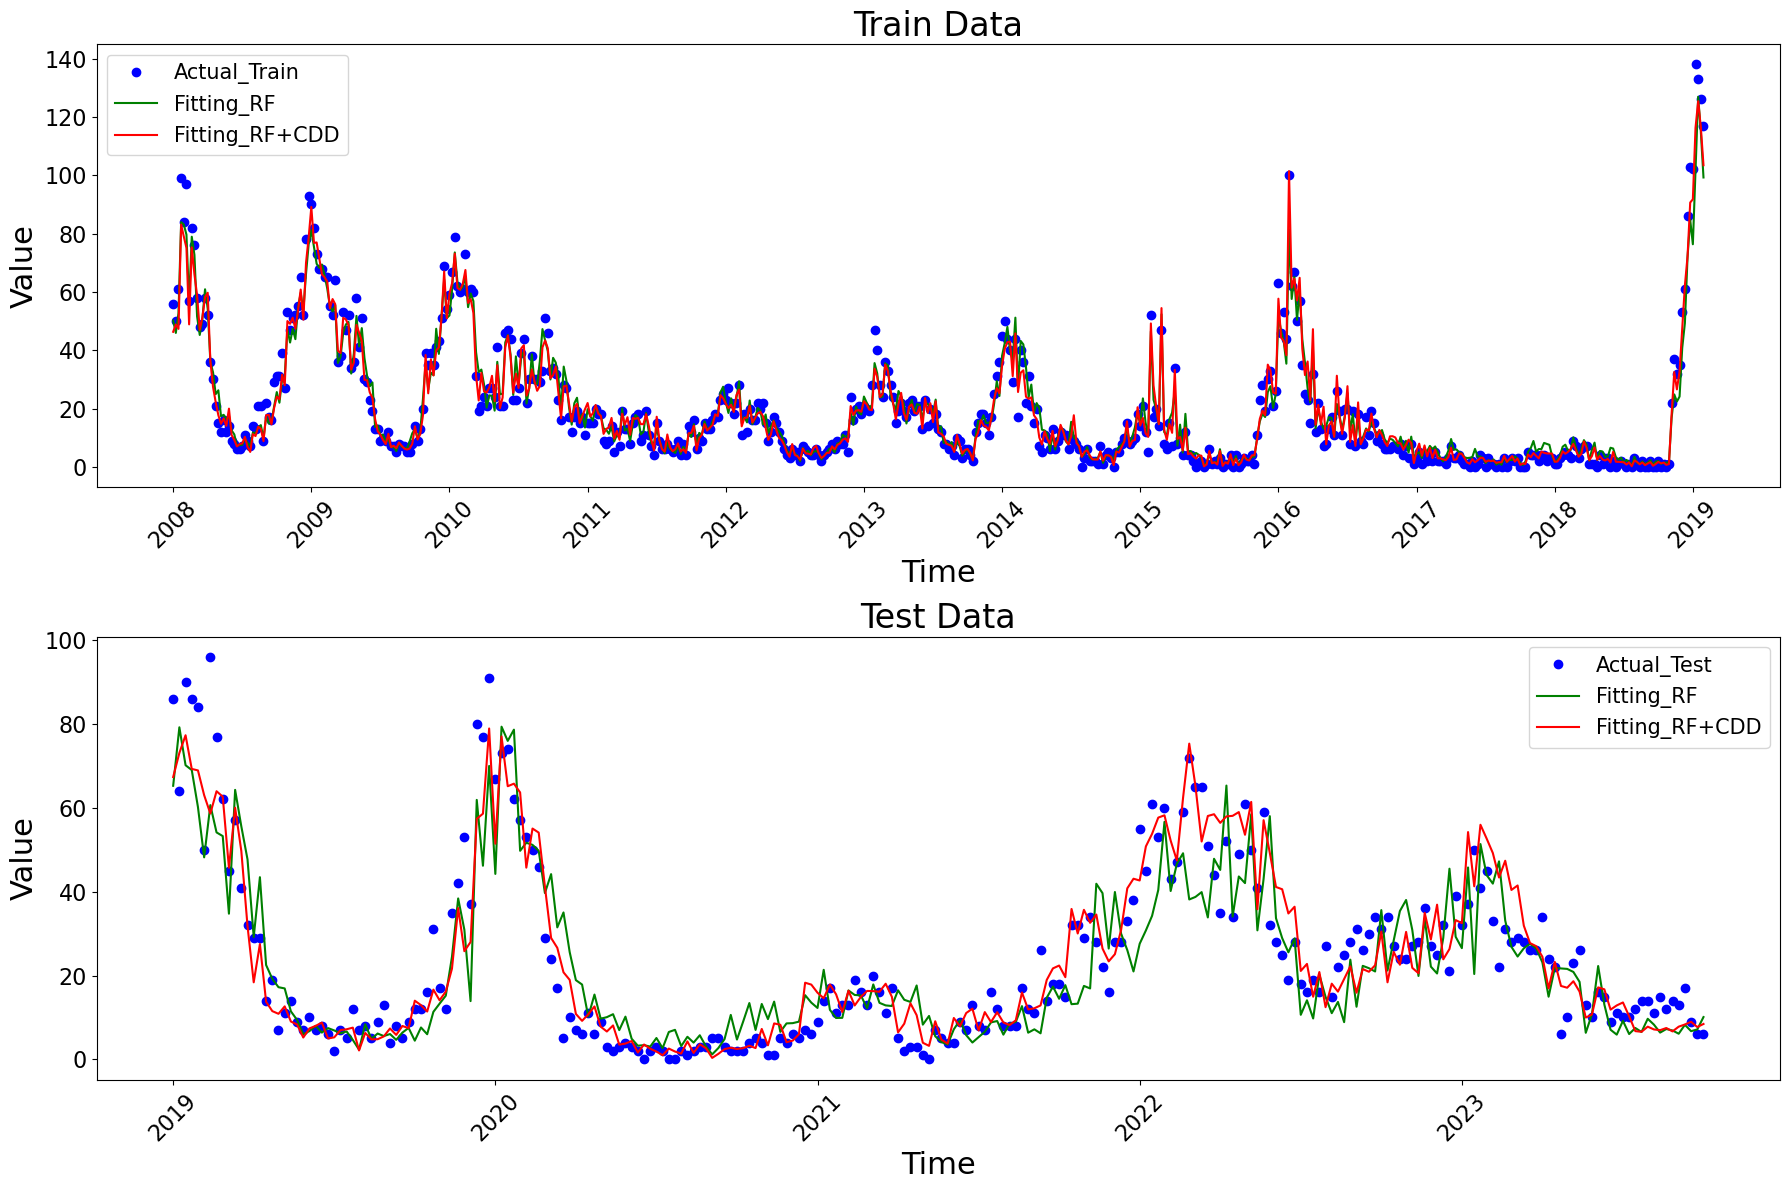

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
# Ekstrak tahun dari data time_train dan time_test (contoh format: "26/11/2023 - 02/12/2023")
time_train_years = [t.split("/")[-1].split(" - ")[-1] for t in time_train]
time_test_years = [t.split("/")[-1].split(" - ")[-1] for t in time_test]

# Plot data
fig, axes = plt.subplots(2, 1, figsize=(18, 12))  # 2 baris, 1 kolom

# Plot pertama: Data train
axes[0].plot(time_train, y_train, 'bo', label='Actual_Train')
axes[0].plot(time_train, y_train_pred, 'g-', label='Fitting_RF')
axes[0].plot(time_train, y_train_pred_2, 'r-', label='Fitting_RF+CDD')
axes[0].set_title("Train Data", fontsize=24)
axes[0].set_xlabel("Time", fontsize=22)
axes[0].set_ylabel("Value", fontsize=22)
axes[0].legend(fontsize=15)

# Atur ticks untuk data train
xticks_train = np.arange(0, len(time_train), 52)  # Setiap 52 minggu
axes[0].set_xticks(xticks_train)
axes[0].set_xticklabels([time_train_years[i] for i in xticks_train])

# Plot kedua: Data test
axes[1].plot(time_test, y_test, 'bo', label='Actual_Test')
axes[1].plot(time_test, y_test_pred, 'g-', label='Fitting_RF')
axes[1].plot(time_test, y_test_pred_2, 'r-', label='Fitting_RF+CDD')
axes[1].set_title("Test Data", fontsize=24)
axes[1].set_xlabel("Time", fontsize=22)
axes[1].set_ylabel("Value", fontsize=22)
axes[1].legend(fontsize=15)

# Atur ticks untuk data test
xticks_test = np.arange(0, len(time_test), 52)  # Setiap 52 minggu
axes[1].set_xticks(xticks_test)
axes[1].set_xticklabels([time_test_years[i] for i in xticks_test])

# Rotasi label untuk rapi
axes[0].tick_params(axis='x', rotation=45,labelsize=16)
axes[1].tick_params(axis='x', rotation=45,labelsize=16)

axes[0].tick_params(axis='y',labelsize=16)
axes[1].tick_params(axis='y',labelsize=16)
# Mengatur tata letak agar tidak overlap
plt.tight_layout()

# Menyimpan plot
plt.savefig('Jakpus_RF_CDD.jpg', dpi=300, bbox_inches='tight')
with PdfPages('Jakpus_RF_CDD.pdf') as pdf:
    pdf.savefig()  # Save the current figure to the PDF

# Menampilkan plot
plt.show()


In [8]:
# Membuat range tanggal mingguan dari 30-12-2008 sampai akhir 2023
all_dates = pd.date_range(start="2008-12-30", end="2023-12-31", freq="W-TUE")  # Setiap Selasa

# Asumsi data Anda (ubah panjangnya sesuai dengan data sebenarnya)
total_length = len(all_dates)
train_length = 577  # Panjang data train
test_length = total_length - train_length  # Panjang data test

# Membagi tanggal menjadi train dan test
time_train = all_dates[:train_length]
time_test = all_dates[train_length:]

len(time_test)


206

In [14]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jakpus_copula_2))
train = jakpus_copula_2[:split_point]
test = jakpus_copula_2[split_point:]
X_train = train.drop('Jumlah.Kasus.DBD (y)', axis=1)
y_train = train['Jumlah.Kasus.DBD (y)']
X_test = test.drop('Jumlah.Kasus.DBD (y)', axis=1)
y_test = test['Jumlah.Kasus.DBD (y)']

n_estimators = range(1, 823, 10)
max_depth = range(1, 101)
min_samples_split = range(2, 14)
min_samples_leaf = range(1, 7)
max_features = [None, 'sqrt']
bootstrap = [True]

total_iterations = (len(n_estimators) * len(max_depth) * 
                    len(min_samples_split) * len(min_samples_leaf) * 
                    len(max_features) * len(bootstrap))

best_params = {}
best_r2_train = float("-inf")
best_r2_test = float("-inf")
best_s = float("-inf")
k = 0

# DataFrame untuk menyimpan hasil tuning
results = pd.DataFrame(columns=[
    'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf',
    'max_features', 'bootstrap', 'R2_train', 'R2_test', 'R2_total'
])

# Modifikasi loop tuning
for n in n_estimators:
    for depth in max_depth:
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                for feature in max_features:
                    for boot in bootstrap:
                        
                        # Clear output and print progress
                        k += 1
                        clear_output(wait=True)
                        
                        percent_complete = (k / total_iterations) * 100
                        print(f"Progress: {k}/{total_iterations} iterations completed ({percent_complete:.2f}%)")
                        
                        # Buat model dan fit ke data
                        model = RandomForestRegressor(
                            n_estimators=n,
                            max_depth=depth,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            max_features=feature,
                            bootstrap=boot,
                            n_jobs=-1,
                            random_state=42
                        )
                        model.fit(X_train, y_train)

                        # Prediksi dan hitung R^2
                        y_train_pred = model.predict(X_train)
                        y_test_pred = model.predict(X_test)
                        r2_train = r2_score(y_train, y_train_pred)
                        r2_test = r2_score(y_test, y_test_pred)
                        total_r2 = r2_test + r2_train

                        # Simpan hasil ke DataFrame
                        results = pd.concat([results, pd.DataFrame([{
                            'n_estimators': n,
                            'max_depth': depth,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf,
                            'max_features': feature,
                            'bootstrap': boot,
                            'R2_train': r2_train,
                            'R2_test': r2_test,
                            'R2_total': total_r2
                        }])], ignore_index=True)

                        # Perbarui parameter terbaik jika R^2 total lebih tinggi
                        if total_r2 > best_s:
                            best_s = total_r2
                            best_r2_train = r2_train
                            best_r2_test = r2_test
                            best_params = {
                                'n_estimators': n,
                                'max_depth': depth,
                                'min_samples_split': split,
                                'min_samples_leaf': leaf,
                                'max_features': feature,
                                'bootstrap': boot
                            }
                        del model

# Setelah selesai, simpan DataFrame ke file CSV atau langsung gunakan untuk grafik
results.to_csv("tuning_results3.csv", index=False)  # Menyimpan hasil ke file CSV

print("Best Parameters for R² Total:", best_params)
print("Best R² Total:", best_s)
print("Best R² Train:", best_r2_train)
print("Best R² Test:", best_r2_test)

Progress: 263/1195200 iterations completed (0.02%)


KeyboardInterrupt: 

In [5]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jakpus_analisis_lag_4))
train = jakpus_analisis_lag_4[:split_point]
test = jakpus_analisis_lag_4[split_point:]
X_train = train.drop('Jumlah.Kasus.DBD (y)', axis=1)
y_train = train['Jumlah.Kasus.DBD (y)']
X_test = test.drop('Jumlah.Kasus.DBD (y)', axis=1)
y_test = test['Jumlah.Kasus.DBD (y)']

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
# Prediksi dan hitung R^2
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
total_r2 = r2_test + r2_train

print(r2_train)
print(r2_test)
print(total_r2)

0.9569795692739924
0.6749115037468514
1.6318910730208438


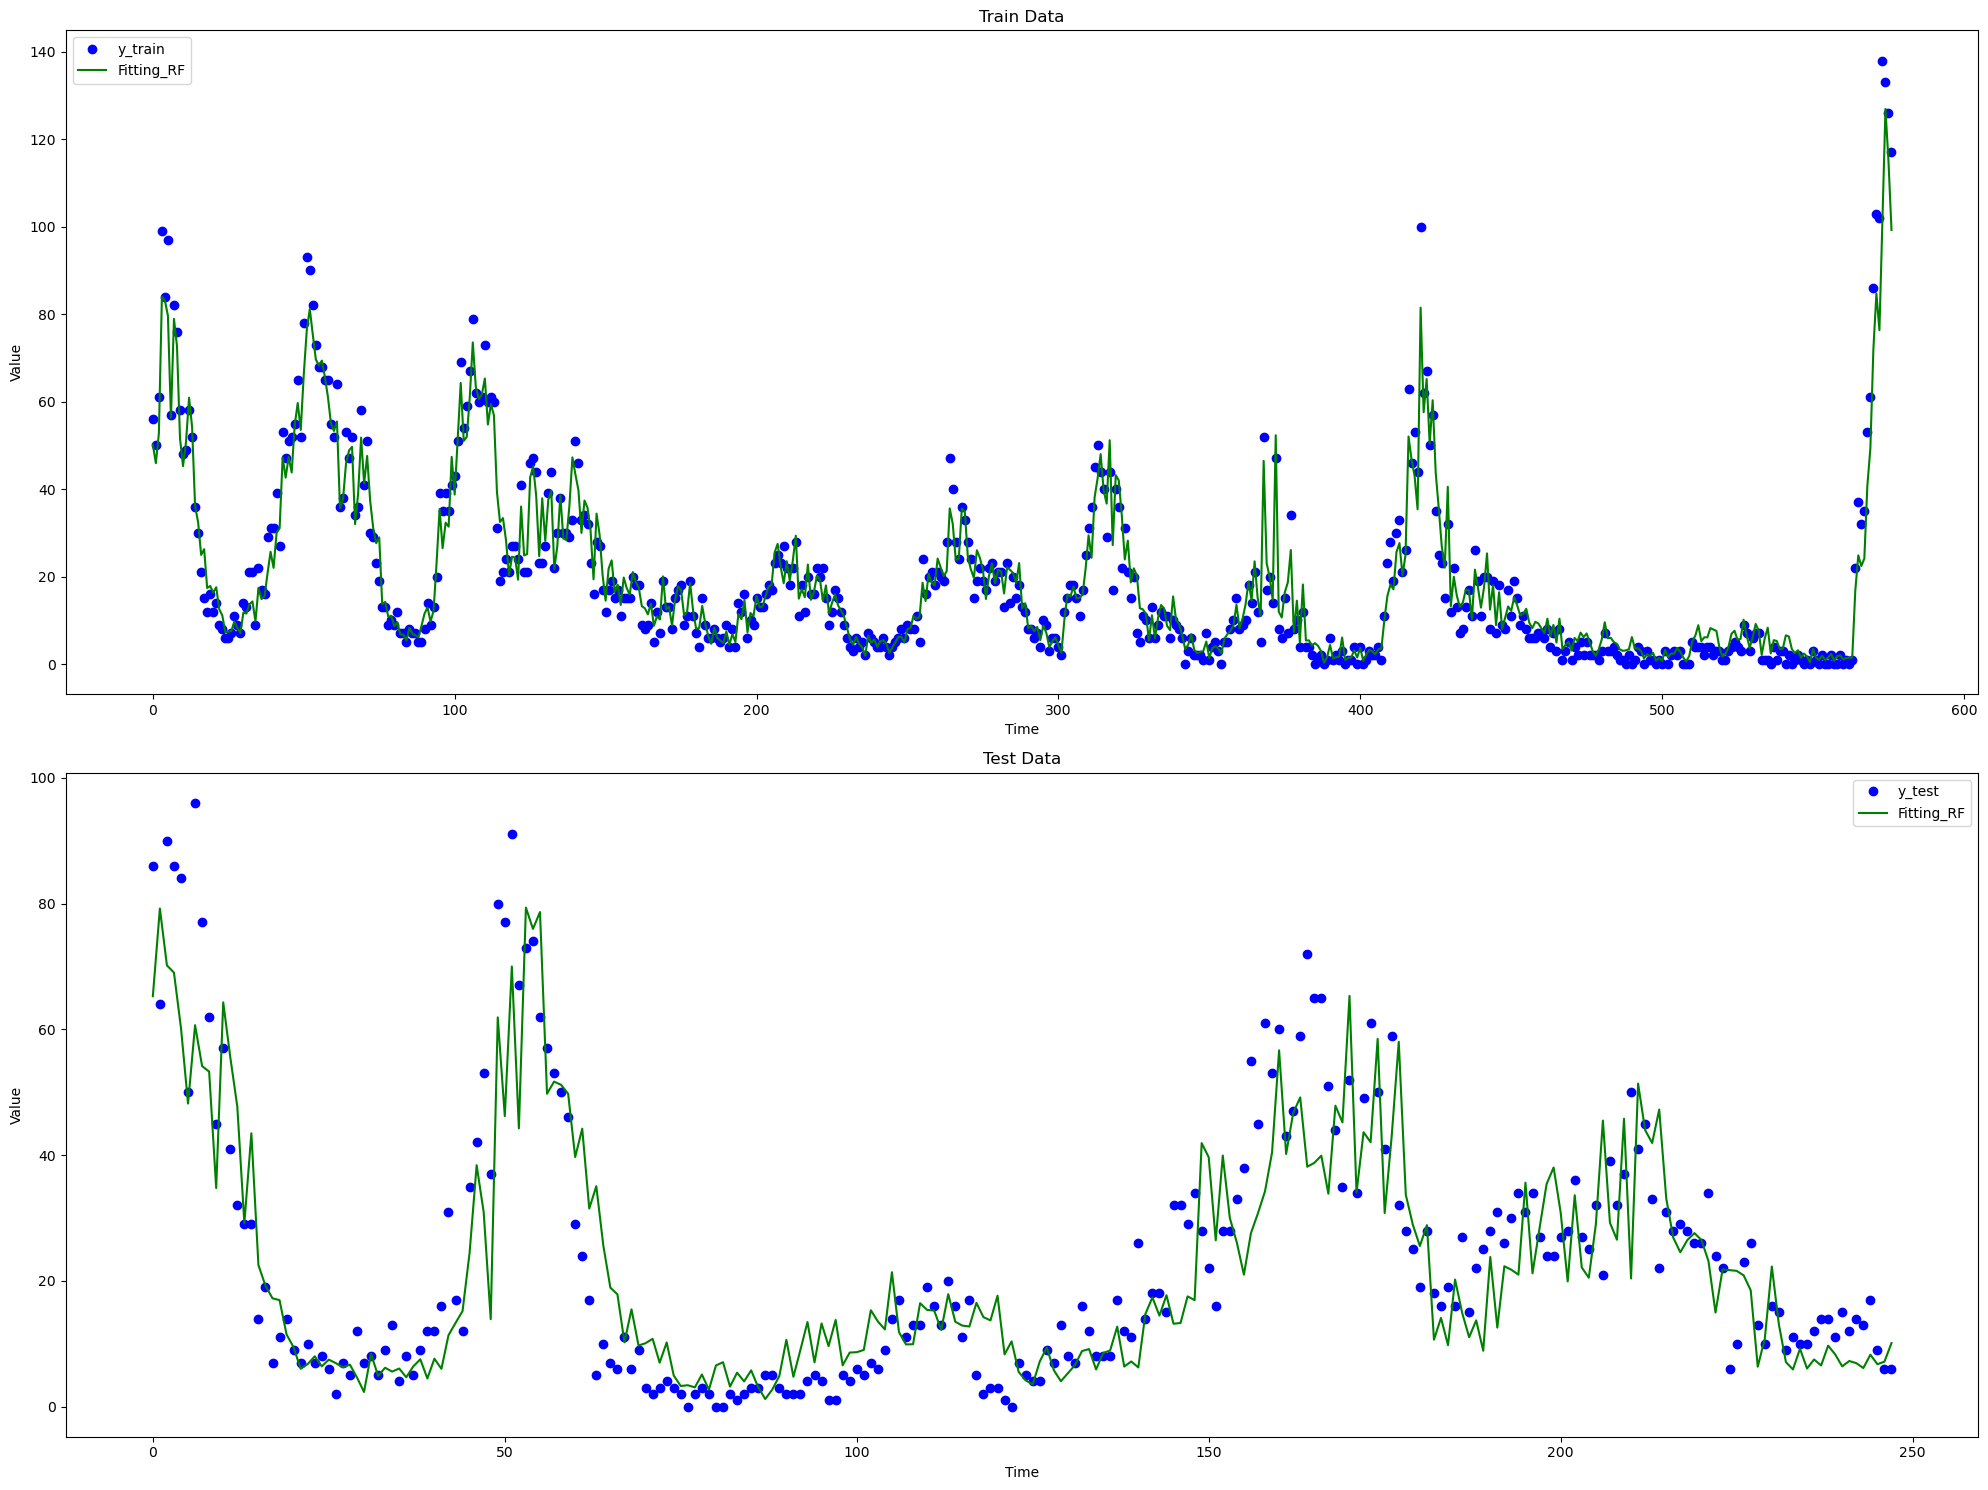

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Asumsi data Anda
time_train = np.arange(0, 577, 1)
time_test = np.arange(0, 248, 1)

# Ukuran figure dan subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 15))  # 2 baris, 1 kolom

time_actual = np.arange(0, 577 + 248, 1)  # Gabungan train dan test
y_actual = np.concatenate([y_train, y_test])  # Gabungkan data train dan test

# Plot pertama: Data train
axes[0].plot(time_train, y_train, 'bo', label='y_train')
axes[0].plot(time_train, y_train_pred, 'g-', label='Fitting_RF')
axes[0].set_title("Train Data")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Value")
axes[0].legend()

# Plot kedua: Data test
axes[1].plot(time_test, y_test, 'bo', label='y_test')
axes[1].plot(time_test, y_test_pred, 'g-', label='Fitting_RF')
axes[1].set_title("Test Data")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Value")
axes[1].legend()

# Mengatur tata letak agar tidak overlap
plt.tight_layout()

plt.savefig('Jakpus_RF', dpi=300, bbox_inches='tight')

# Menampilkan plot
plt.show()


In [58]:
# Mengonversi kolom Tanggal menjadi datetime
jakpus_analisis['Tanggal'] = pd.to_datetime(jakpus_analisis['Tanggal'].str.split(' - ').str[0], format='%d/%m/%Y')

# Menambahkan kolom Tahun dan Bulan
jakpus_analisis['Bulan'] = jakpus_analisis['Tanggal'].dt.month

# Agregasi data per bulan
jakpus_analisis_monthly = jakpus_analisis.groupby('Bulan').agg({
    'Average.of.Tavg': 'mean',
    'Average.of.Rhavg': 'mean',
    'Sum.of.RR': 'mean',
    'Average.of.ss': 'mean'
}).reset_index()

jakpus_analisis_monthly.head()

AttributeError: Can only use .str accessor with string values!

In [43]:
# Mengagregasi data berdasarkan bulan dan tahun
jakpus_analisis_monthly = jakpus_analisis.groupby(['Tahun', 'Bulan']).agg({
    'Average.of.Tavg': 'mean',
    'Average.of.Rhavg': 'mean',
    'Sum.of.RR': 'mean',
    'Average.of.ss': 'mean'
}).reset_index()

jakpus_analisis_monthly.head()  # Menampilkan hasil agregasi


,Tahun,Bulan,Average.of.Tavg,Average.of.Rhavg,Sum.of.RR,Average.of.ss
0,2008,3,27.921429,81.142857,98.975000,4.927679
1,2008,4,26.457143,81.821429,111.085000,1.715774
2,2008,5,27.660714,76.178571,58.081667,3.393929
3,2008,6,28.291429,75.838095,47.558000,4.615429
4,2008,7,28.892857,71.714286,6.475000,6.214286


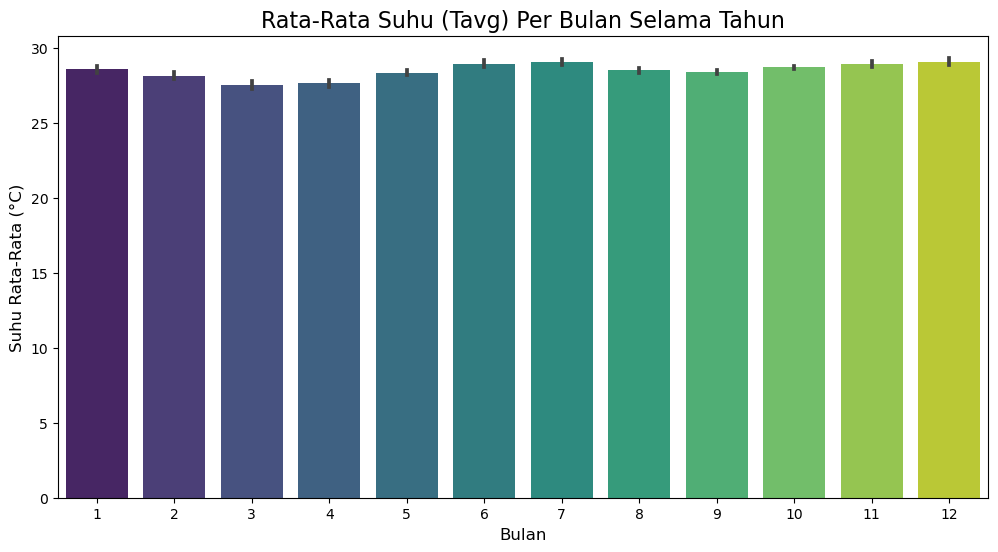

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set ukuran figure
plt.figure(figsize=(12, 6))

# Membuat bar chart untuk rata-rata suhu (Average.of.Tavg)
sns.barplot(x='Bulan', y='Average.of.Tavg', data=jakpus_analisis_monthly, palette='viridis')

# Menambahkan judul dan label
plt.title('Rata-Rata Suhu (Tavg) Per Bulan Selama Tahun', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Suhu Rata-Rata (°C)', fontsize=12)

# Menampilkan plot
plt.show()


In [61]:
# Mengganti nama kolom tertentu
data_combined = jaktim_analisis.rename(columns={
    'Average of Tavg': 'Average.of.Tavg',
    'Average of Rhavg': 'Average.of.Rhavg',
    'Sum of RR': 'Sum.of.RR',
    'Average of ss': 'Average.of.ss'
})

# Menampilkan DataFrame dengan kolom yang sudah diganti
print(data_combined.head())


   Minggu ke    Tanggal  Jumlah Kasus DBD (y)  Average.of.Tavg  \
0         11 2008-03-09                   125        28.571429   
1         12 2008-03-16                   130        28.742857   
2         13 2008-03-23                   163        27.600000   
3         14 2008-03-30                   199        26.771429   
4         15 2008-04-06                   223        25.900000   

   Average.of.Rhavg  Sum.of.RR  Average.of.ss  Sum of pengguna krl  \
0         73.714286      105.1       6.085714             4.692709   
1         72.000000        4.8       5.085714             4.412848   
2         74.857143        2.8       6.328571             4.266629   
3         81.428571        0.6       2.930952             4.089555   
4         83.285714      387.7       1.404762             3.711553   

   Jumlah Kasus DBD lag 4 Wilayah  
0                     125  Jaktim  
1                     113  Jaktim  
2                     106  Jaktim  
3                     118  Jaktim  
4 

  Tanggal  Bulan Wilayah  Average.of.Tavg
0     NaT    NaN  Jakpus        28.571429
1     NaT    NaN  Jakpus        28.742857
2     NaT    NaN  Jakpus        27.600000
3     NaT    NaN  Jakpus        26.771429
4     NaT    NaN  Jakpus        25.900000


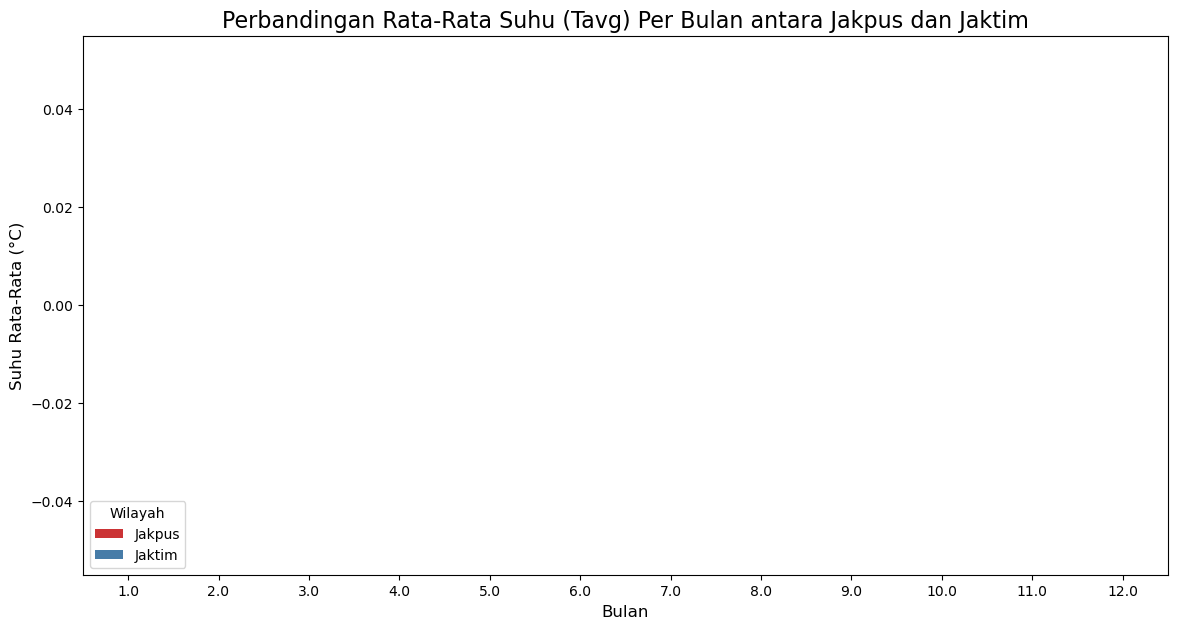

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom 'Tanggal' sudah dalam format datetime
jakpus_analisis['Tanggal'] = pd.to_datetime(jakpus_analisis['Tanggal'], errors='coerce')
jaktim_analisis['Tanggal'] = pd.to_datetime(jaktim_analisis['Tanggal'], errors='coerce')

# Tambahkan kolom 'Bulan' berdasarkan kolom 'Tanggal'
jakpus_analisis['Bulan'] = jakpus_analisis['Tanggal'].dt.month
jaktim_analisis['Bulan'] = jaktim_analisis['Tanggal'].dt.month

# Pastikan kolom 'Wilayah' sudah ada
jakpus_analisis['Wilayah'] = 'Jakpus'
jaktim_analisis['Wilayah'] = 'Jaktim'

# Gabungkan data Jakpus dan Jaktim
data_combined = pd.concat([jakpus_analisis, jaktim_analisis], ignore_index=True)

# Periksa apakah kolom 'Bulan' ada di data_combined
print(data_combined[['Tanggal', 'Bulan', 'Wilayah', 'Average.of.Tavg']].head())  # Cek apakah kolom 'Bulan' dan 'Average.of.Tavg' ada

# Visualisasi
plt.figure(figsize=(14, 7))

# Pastikan kolom 'Average.of.Tavg' ada dan sesuai nama
sns.barplot(x='Bulan', y='Average.of.Tavg', hue='Wilayah', data=data_combined, palette='Set1')

# Menambahkan judul dan label
plt.title('Perbandingan Rata-Rata Suhu (Tavg) Per Bulan antara Jakpus dan Jaktim', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Suhu Rata-Rata (°C)', fontsize=12)

# Menampilkan plot
plt.show()


In [64]:
data_combined

,Unnamed: 0,Tanggal,Jumlah.Kasus.DBD (y),Average.of.Tavg,Average.of.Rhavg,Sum.of.RR,Average.of.ss,Sum.of.pengguna.krl,Jumlah.Kasus.DBD lag 4,Bulan,Tahun,Wilayah,Minggu ke,Jumlah Kasus DBD (y),Average of Tavg,Average of Rhavg,Sum of RR,Average of ss,Sum of pengguna krl,Jumlah Kasus DBD lag 4
0,11.0,NaT,56.0,28.571429,74.857143,4.8,2.210714,4.266629,49.0,3.0,2008.0,Jakpus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,NaT,50.0,28.742857,81.428571,2.8,6.085714,4.089555,50.0,3.0,2008.0,Jakpus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.0,NaT,61.0,27.600000,83.285714,0.6,5.085714,3.711553,48.0,3.0,2008.0,Jakpus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.0,NaT,99.0,26.771429,85.000000,387.7,6.328571,4.581505,47.0,3.0,2008.0,Jakpus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,NaT,84.0,25.900000,83.428571,116.1,2.930952,4.447622,56.0,4.0,2008.0,Jakpus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NaN,2024-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaktim,858.0,355.0,29.085714,79.285714,46.325000,3.900000,3.666291,287.0
1700,NaN,2024-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaktim,859.0,358.0,29.700000,78.857143,35.050000,3.400000,3.678019,388.0
1701,NaN,2024-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaktim,860.0,346.0,29.857143,76.714286,71.966667,4.128571,4.112467,387.0
1702,NaN,2024-06-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaktim,861.0,288.0,30.742857,77.142857,62.125000,3.328571,3.443133,332.0
